<a href="https://colab.research.google.com/github/ducqhl/python-for-ai/blob/main/Simple_PCA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple PCA with Python

Trong phần này, chúng ta cùng làm một thử nghiệm nhỏ trên tập dữ liệu [Yale face database](https://drive.google.com/drive/folders/1KAKh8Tvb-WUnhkk4nMXnf1fHB78x1arU?usp=sharing). Các bức ảnh trong thí nghiệm này đã được căn chỉnh cho cùng với kích thước và khuôn mặt nằm trọn vẹn trong một hình chữ nhật có kích thước 116×98 pixel. Có tất cả 15 người khác nhau, mỗi người có 11 bức ảnh được chụp ở các điều kiện ánh sáng và cảm xúc khác nhau, bao gồm: ‘centerlight’, ‘glasses’, ‘happy’, ‘leftlight’, ‘noglasses’, ‘normal’, ‘rightlight’,’sad’, ‘sleepy’, ‘surprised’, và ‘wink’.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Teaching/CITD/CS116/L06/imgs/'
ids = range(1, 16)
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

h = 243 # hight
w = 320 # width
D = h * w
N = len(states)*15

X = np.zeros((D, N))

In [ ]:
# collect all data
cnt = 0
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = plt.imread(fn).reshape(D)
        cnt += 1

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100
pca.fit(X.T)

PCA(n_components=100)

In [ ]:
# projection matrix
U = pca.components_.T

Hình  1


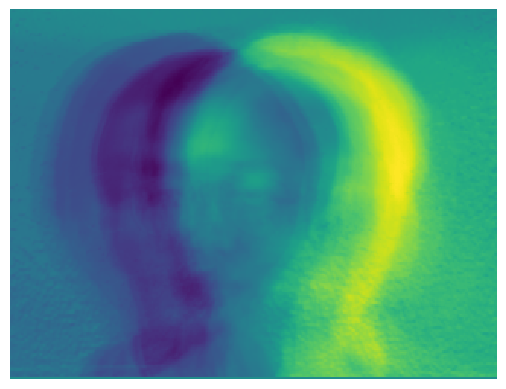

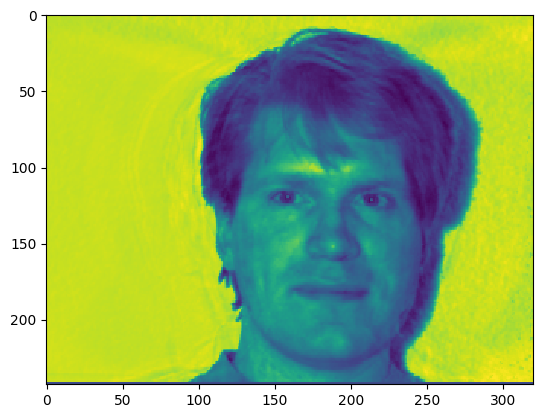

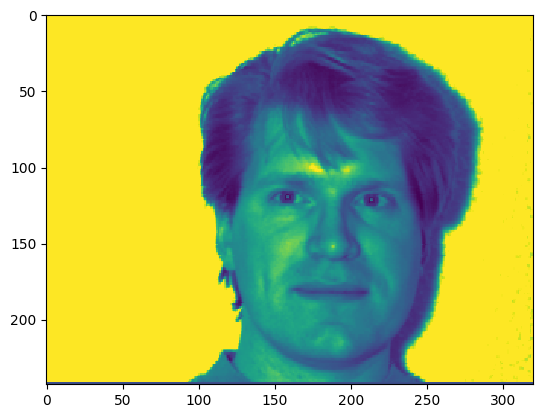

In [ ]:
import matplotlib.pyplot as plt
for i in range(1):
  print("Hình ", i+1)
  plt.axis('off')
  f1 = plt.imshow(U[:, i].reshape(243, 320), interpolation='nearest')
  plt.show()

  # reshape and subtract mean
  x_hat = X[:, i].reshape(D, 1) - pca.mean_.reshape(D, 1)
  # encode
  z = U.T.dot(x_hat)
  #decode
  x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
  f1 = plt.imshow(x_tilde.reshape(243, 320), interpolation='nearest')
  plt.show()

  f1 = plt.imshow(X[:, i].reshape(243, 320), interpolation='nearest')
  plt.show()